# The Health Company Diet

# Importing the Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA
%matplotlib inline
import matplotlib.pyplot as plt

# Loading the dataset CSV file

In [3]:
df=pd.read_csv('./diet.csv')

# Checking the top 5 records

In [4]:
df.head()

,gender,diet,preweight,weight6weeks
0,M,B,60,60.0
1,M,B,103,103.0
2,F,A,58,54.2
3,F,A,60,54.0
4,F,A,64,63.3


# Checking the shape and information of the dataframe

In [5]:
df.shape

(78, 4)

In [14]:
df.describe()

,preweight,weight6weeks
count,78.000000,78.000000
mean,72.525641,68.680769
std,8.723344,8.924504
min,58.000000,53.000000
25%,66.000000,61.850000
50%,72.000000,68.950000
75%,78.000000,73.825000
max,103.000000,103.000000


# Checking the summary of the dataframe

In [6]:
df.describe()

,preweight,weight6weeks
count,78.000000,78.000000
mean,72.525641,68.680769
std,8.723344,8.924504
min,58.000000,53.000000
25%,66.000000,61.850000
50%,72.000000,68.950000
75%,78.000000,73.825000
max,103.000000,103.000000


# Checking for missing values

In [15]:
df.isnull().sum()

gender          0
diet            0
preweight       0
weight6weeks    0
dtype: int64

# Checking distinct values of Diet

In [16]:
df.diet.value_counts()

B    27
C    27
A    24
Name: diet, dtype: int64

# Creating box plots

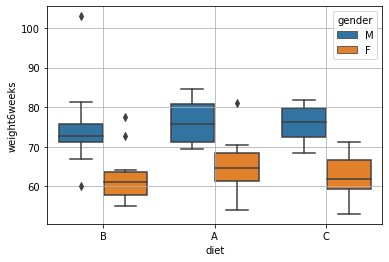

In [17]:
sns.boxplot(x="diet", y="weight6weeks", data=df,hue='gender')
plt.grid()
plt.show()

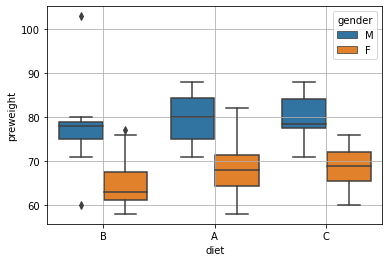

In [9]:
sns.boxplot(x="diet", y="preweight", data=df,hue='gender')
plt.grid()
plt.show()

Looking at above boxplot of preweight and weight6weeks, we can observe that there is a change in the weights

# Formulate the hypothesis of the One-way ANOVA of 'gender' variable with the 'weight6weeks' variable.

$H_0$ : The means of 'weight6weeks' variable with respect to each gender is equal.

$H_1$ : At least one of the means of 'weight6weeks' variable with respect to each gender is unequal.

# One-way ANOVA with the 'gender' variable.

In [18]:
formula = 'weight6weeks ~ C(gender)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
print(aov_table)

             df       sum_sq      mean_sq          F        PR(>F)
C(gender)   1.0  2854.201553  2854.201553  66.162186  6.097209e-12
Residual   76.0  3278.599601    43.139468        NaN           NaN


Since the p value in this scenario is less than $\alpha$ (0.05), we can say that we reject the Null Hypothesis ($H_0$).

# Formulate the hypothesis of the One-way ANOVA of 'Diet' variable with the 'weight6weeks' variable.

$H_0$ : The means of 'weight6weeks' variable with respect to each diet category is equal.

$H_1$ : At least one of the means of 'weight6weeks' variable with respect to each diet category is unequal.

# One-way ANOVA with the 'Diet' variable.

In [19]:
formula = 'weight6weeks ~ C(diet)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
print(aov_table)

            df       sum_sq    mean_sq         F    PR(>F)
C(diet)    2.0    29.841339  14.920670  0.183362  0.832839
Residual  75.0  6102.959815  81.372798       NaN       NaN


Since the p value in this scenario is greater than $\alpha$ (0.05), we can say that we fail to reject the Null Hypothesis ($H_0$).

# Formulate the hypothesis of ANOVA with both 'gender' and 'Diet' variables with respect to the variable 'weight6weeks'.

$H_0$ : The means of 'weight6weeks' variable with respect to each diet category and gender is equal.

$H_1$ : At least one of the means of 'weight6weeks' variable with respect to each diet category and gender is unequal.

# ANOVA with both 'gender' and 'Diet' variables with respect to the variable 'weight6weeks'.

In [25]:
formula = 'weight6weeks ~ C(diet) + C(gender)'
model = ols(formula, df).fit()
aov_table = anova_lm(model, type=2)
print(aov_table)

             df       sum_sq      mean_sq          F        PR(>F)
C(diet)     2.0    29.841339    14.920670   0.343796  7.102001e-01
C(gender)   1.0  2891.375733  2891.375733  66.621891  6.390777e-12
Residual   74.0  3211.584082    43.399785        NaN           NaN


Considering both the factors(diet and gender), gender is a significant factor as the p value is <0.05 wheras diet is not a significant variable as p value of diet is >0.05

# Plot the interaction plot between the two variables and comment on the extent of interaction between the two categorical variables. 

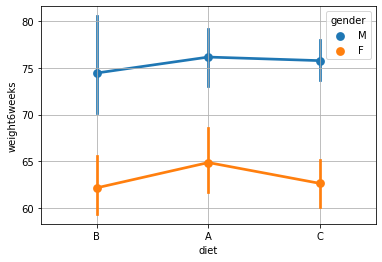

In [10]:
sns.pointplot(x = 'diet', y = 'weight6weeks', hue='gender',data=df)
plt.grid()
plt.show()

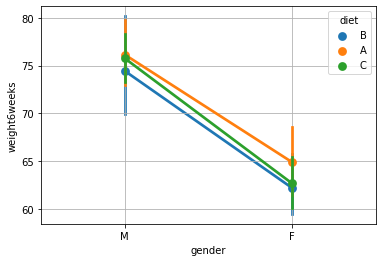

In [22]:
sns.pointplot(x = 'gender', y = 'weight6weeks', hue='diet',data=df)
plt.grid()
plt.show()

As seen from the above two interaction plots, there seems to be very less or almost no interaction amongst the two categorical variables.

In [24]:
#Interaction Effect:
formula = 'weight6weeks ~ C(diet) + C(gender) + C(diet):C(gender)'
model = ols(formula, df).fit()
aov_table = anova_lm(model, type=2)
print(aov_table)

                     df       sum_sq      mean_sq          F        PR(>F)
C(diet)             2.0    29.841339    14.920670   0.335607  7.160162e-01
C(gender)           1.0  2891.375733  2891.375733  65.035052  1.162414e-11
C(diet):C(gender)   2.0    10.555631     5.277816   0.118713  8.882364e-01
Residual           72.0  3201.028451    44.458728        NaN           NaN


As gender and diet interaction is 0.888 which is >0.05 , there seems to be almost no statistical interaction.

In [23]:
formula = 'weight6weeks ~ preweight + C(gender) + C(diet) + C(gender):C(diet)'
model=ols(formula,data=df).fit()
aov_table=anova_lm(model,type=2)
print(aov_table)

                     df       sum_sq      mean_sq           F        PR(>F)
C(gender)           1.0  2854.201553  2854.201553  501.808855  6.501384e-34
C(diet)             2.0    67.015520    33.507760    5.891136  4.294332e-03
C(gender):C(diet)   2.0    10.555631     5.277816    0.927914  4.001185e-01
preweight           1.0  2797.192790  2797.192790  491.785911  1.218141e-33
Residual           71.0   403.835660     5.687826         NaN           NaN


Preweight is a significant predictor of sales. The interaction of gender and diet has now become slightly important. 

# END

###### Note: $\underline{Definition}$ of  a concomitant variable, or covariate, is a variable which we observe during the course of our research or statistical analysis, but we cannot control it and it is not the focus of our analysis.

Here, preweight is a concomitant variable.